In [9]:
# Cifrado Vigenere para generar la clave automaticamente, la clase es la que se va a cifrar con la canción

import numpy as np

def chartonum (text):
    numlist=[]
    y= ''.join(ch for ch in text if ch.isalpha()).lower()
    x = list(y)
    for i in x:
        numlist.append(abs(ord(i)-97))
    return numlist

def numtochar(text):
    charlist=""
    for i in text:
        charlist+= chr(i+97)
    return charlist.upper()

def generateKey(string):
    y= []
    x= np.random.randint(1, len(string))
    for _ in range(x):
        y.append(np.random.randint(26))
    key = numtochar(y)
    return key

def cipherText(string, key):
    cipher_text = []
    string = chartonum(string)
    key = chartonum(key)
    for i in range(len(string)):
        x = (string[i] + key[i%len(key)]) % 26
        cipher_text.append(x)
    return "".join(numtochar(cipher_text).upper())


def DecryptedText(cipher_text, key):
    orig_text = []
    cipher_text = chartonum(cipher_text)
    key = chartonum(key)
    for i in range(len(cipher_text)):
        x = (cipher_text[i] - key[i%len(key)] + 26) % 26
        orig_text.append(x)
    return ("".join(numtochar(orig_text))).upper()

In [199]:
string = 'Amo la Criptografia'
key = generateKey(string)
cipher_text = cipherText(string, key)
print("key :", key)
print("Ciphertext :", cipher_text)

print("Original/Decrypted Text :", DecryptedText(cipher_text, key))

key : BRWUULZDYB
Ciphertext : BDKFUNQLNUPXNUZTZ
Original/Decrypted Text : AMOLACRIPTOGRAFIA


In [223]:
import librosa
import numpy as np
import soundfile as sf

def codificar_cancion(cancion, clave):
    # Cargar la canción
    y, sr = librosa.load(cancion)

    # Transformar la clave en una secuencia de números
    secuencia_clave = [ord(c) for c in clave]

    # Elegir un índice de inicio aleatorio
    inicio_aleatorio = np.random.randint(0, len(y) - len(clave) + 1)

    # Modificar la canción para ocultar la clave
    for i, valor_clave in enumerate(secuencia_clave):
        y[inicio_aleatorio + i] += valor_clave * 0.001  # Modificar el volumen para representar la clave

    # Guardar la nueva canción
    sf.write('cancion_oculta.wav', y, sr)

def desencriptar_cancion(cancion_original, cancion_codificada, longitud_clave):
    # Cargar las canciones
    y_original, sr_original = librosa.load(cancion_original)
    y_codificada, sr_codificada = librosa.load(cancion_codificada)

    # Verificar que ambas canciones tengan la misma longitud
    if len(y_original) != len(y_codificada):
        raise ValueError("Las longitudes de las canciones no coinciden.")

    # Inicializar la clave recuperada
    clave_recuperada = []

    # Buscar la primera diferencia significativa en y[i]
    for i in range(len(y_original)):
        diferencia_absoluta = np.abs(y_original[i] - y_codificada[i])

        # Arbitrariamente elegir un umbral, ajusta según sea necesario
        umbral = 0.01

        if diferencia_absoluta > umbral:
            informacion_oculta = []
            for j in range(longitud_clave):
                #print(f'{i+j}: {y_codificada[i+j]} -> {round((y_codificada[i+j]-y_original[i+j])*1000)}')
                informacion_oculta.append(round((y_codificada[i+j]-y_original[i+j])*1000))  # Extraer el valor de la clave

            # Convertir la información en texto
            clave_oculta = ''.join(chr(valor) for valor in informacion_oculta)
            print("Clave oculta:", clave_oculta)
            break

# Ejemplo de uso
cancion_original = 'bass.wav'
cancion_codificada = 'cancion_oculta.wav'
clave_secreta = 'BRWUULZDYB'
codificar_cancion(cancion_original, clave_secreta)
desencriptar_cancion(cancion_original, cancion_codificada, len('CPSSHBDBAYJMUMFDZQ'))


Clave oculta: BRWUULZDYB        


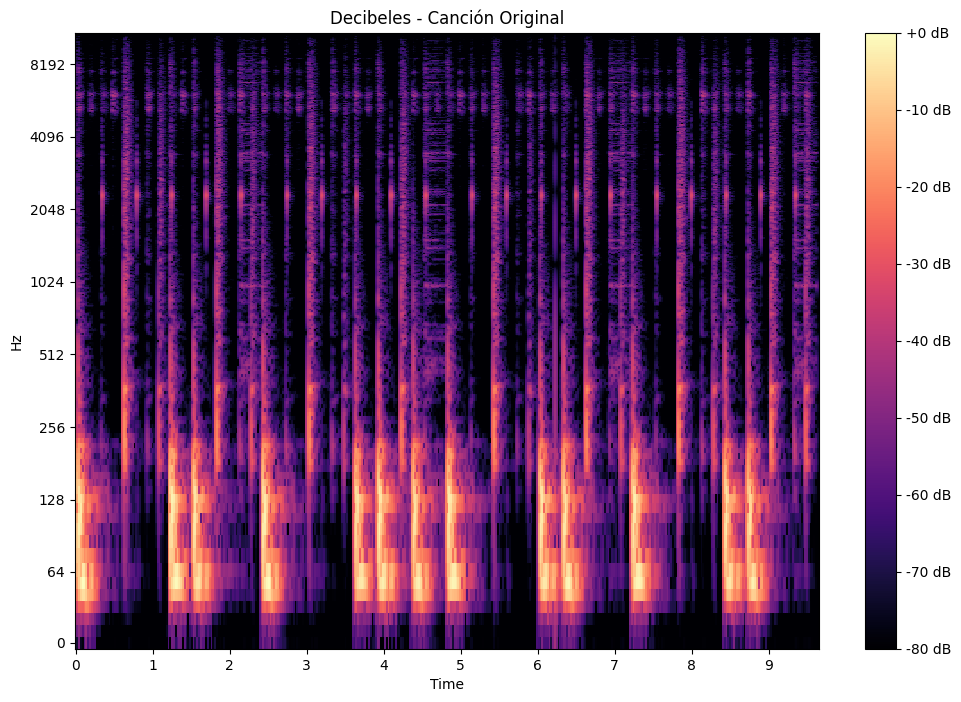

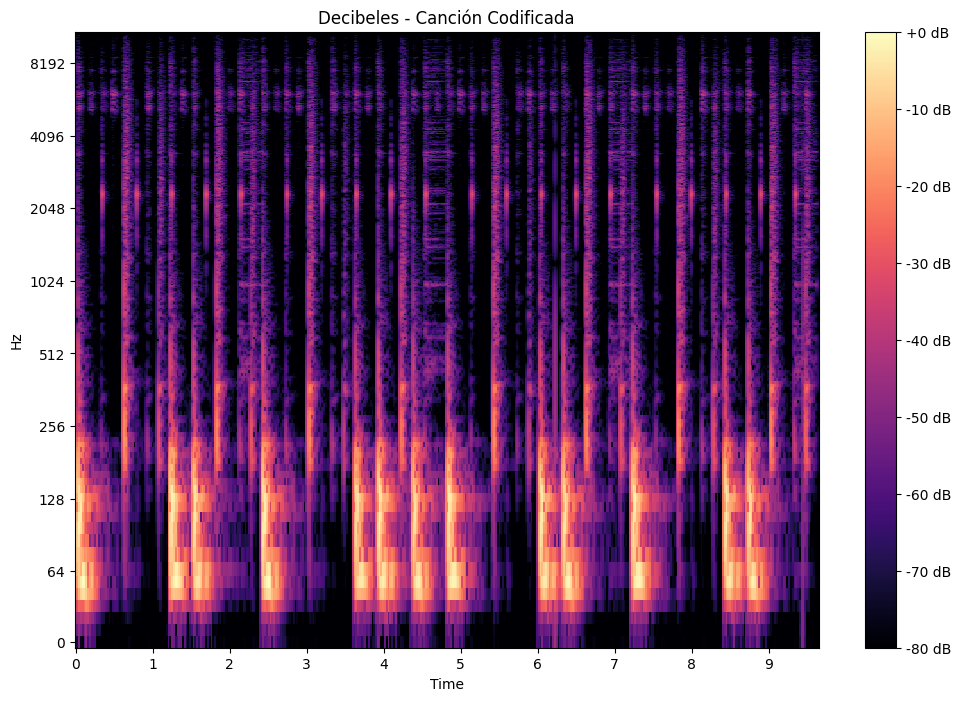

In [216]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def plotear_decibeles(cancion, titulo):
    # Cargar la canción
    y, sr = librosa.load(cancion)

    # Calcular los decibeles
    decibeles = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(decibeles, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(titulo)
    plt.show()

# Rutas de las canciones
cancion_original = 'bass.wav'
cancion_codificada = 'cancion_oculta.wav'

# Plotear los decibeles de la canción original
plotear_decibeles(cancion_original, 'Decibeles - Canción Original')

# Plotear los decibeles de la canción codificada
plotear_decibeles(cancion_codificada, 'Decibeles - Canción Codificada')

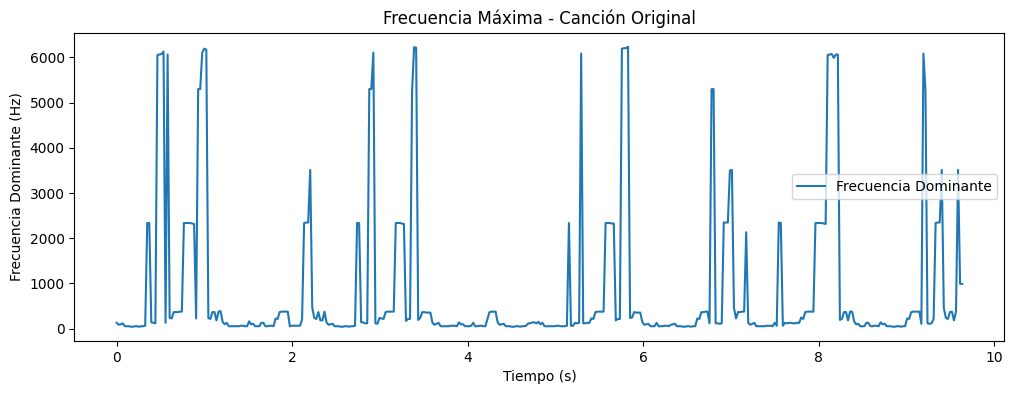

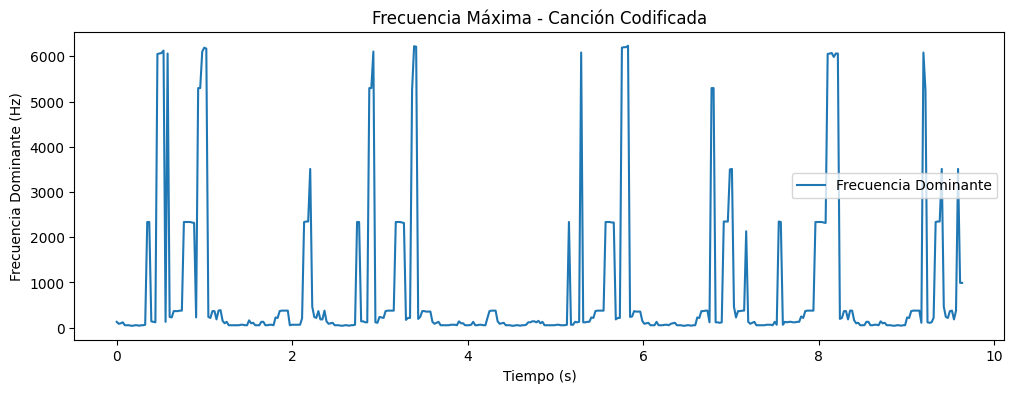

In [205]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def plotear_frecuencia_maxima(cancion, titulo):
    # Cargar la canción
    y, sr = librosa.load(cancion)

    # Calcular la transformada de Fourier de corto plazo (STFT)
    stft = librosa.stft(y)
    # Calcular la frecuencia dominante en cada frame
    frecuencia_maxima = np.argmax(np.abs(stft), axis=0)
    # Obtener las frecuencias correspondientes
    frecuencias = librosa.core.fft_frequencies(sr=sr)

    # Crear el gráfico de línea
    tiempo = librosa.times_like(frecuencia_maxima, sr=sr)
    plt.figure(figsize=(12, 4))
    plt.plot(tiempo, frecuencias[frecuencia_maxima], label='Frecuencia Dominante')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia Dominante (Hz)')
    plt.title(titulo)
    plt.legend()
    plt.show()

# Rutas de las canciones
cancion_original = 'bass.wav'
cancion_codificada = 'cancion_oculta.wav'

# Plotear la frecuencia máxima de la canción original
plotear_frecuencia_maxima(cancion_original, 'Frecuencia Máxima - Canción Original')

# Plotear la frecuencia máxima de la canción codificada
plotear_frecuencia_maxima(cancion_codificada, 'Frecuencia Máxima - Canción Codificada')


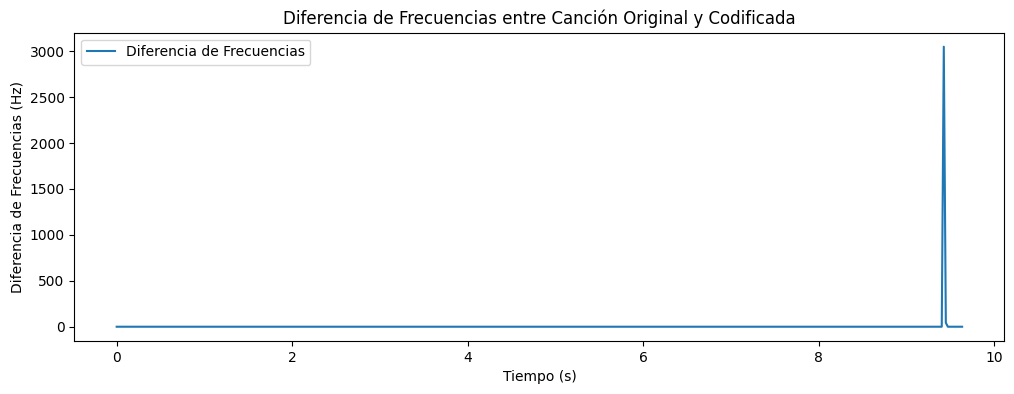

In [214]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def plotear_frecuencia_maxima(cancion, titulo):
    # Cargar la canción
    y, sr = librosa.load(cancion)

    # Calcular la transformada de Fourier de corto plazo (STFT)
    stft = librosa.stft(y)
    # Calcular la frecuencia dominante en cada frame
    frecuencia_maxima = np.argmax(np.abs(stft), axis=0)
    # Obtener las frecuencias correspondientes
    frecuencias = librosa.core.fft_frequencies(sr=sr)

    return frecuencias[frecuencia_maxima]

# Rutas de las canciones
cancion_original = 'BASS.WAV'
cancion_codificada = 'cancion_oculta.wav'

# Plotear la frecuencia máxima de la canción original
frecuencias_original = plotear_frecuencia_maxima(cancion_original, 'Frecuencia Máxima - Canción Original')

# Plotear la frecuencia máxima de la canción codificada
frecuencias_codificada = plotear_frecuencia_maxima(cancion_codificada, 'Frecuencia Máxima - Canción Codificada')

# Crear el gráfico de línea para la diferencia de frecuencias
tiempo = librosa.times_like(frecuencias_original)
diferencia_frecuencias = frecuencias_codificada - frecuencias_original

plt.figure(figsize=(12, 4))
plt.plot(tiempo, diferencia_frecuencias, label='Diferencia de Frecuencias')
plt.xlabel('Tiempo (s)')
plt.ylabel('Diferencia de Frecuencias (Hz)')
plt.title('Diferencia de Frecuencias entre Canción Original y Codificada')
plt.legend()
plt.show()
